# Infraestrutura e Dependências 

## * Verificando se o tensorflow encontra a GPU local

In [22]:
import tensorflow as tf

# List available GPUs

gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

# Allocate GPU memory dynamically
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## * Verificando as propriedades da GPU local

In [23]:
!nvidia-smi


Tue Sep 19 23:44:16 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650         On | 00000000:01:00.0 Off |                  N/A |
| N/A   50C    P0               12W /  50W|   3037MiB /  4096MiB |     22%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## * Verificando se as bilbiotecas foram instaladas corretamente, junto do tensorflow

In [24]:
!pip list

Package                      Version
---------------------------- --------------------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
backcall                     0.2.0
beautifulsoup4               4.12.0
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2019.11.28
cffi                         1.15.1
chardet                      3.0.4
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
dbus-python                  1.2.16
debugpy                      1.6.6
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
fastjsonschema               2.16.3
flatbuffers                  23.3.3
fonttools               

# Análise e processamento dos dados T1

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import math

In [26]:
CURRENT = os.getcwd()
ROOT = os.path.join("/project")
DATASETS = os.path.join(ROOT, "datasets")
DATASETS_EXTRACTED = os.path.join(DATASETS, "extracted")
T2_PATH = os.path.join(DATASETS_EXTRACTED, "T2FS.csv")

In [41]:
T2 = pd.read_csv(T2_PATH) \
      .sort_values(by="case_PatientID", ignore_index=True)

In [42]:
T2.head()

,case_PatientID,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,...,T2FS_wavelet-LLL_gldm_LowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_ngtdm_Busyness,T2FS_wavelet-LLL_ngtdm_Coarseness,T2FS_wavelet-LLL_ngtdm_Complexity,T2FS_wavelet-LLL_ngtdm_Contrast,T2FS_wavelet-LLL_ngtdm_Strength,T2FS_LungMets
0,STS_001,0.769468,0.642796,64.982564,101.093605,116.730459,111.000000,94.201911,118.224363,363616.875,...,0.000306,0.623462,4077.229667,0.000234,0.098624,0.000907,54522.134897,0.365681,5.735231,0
1,STS_005,0.601763,0.490816,69.224991,141.040479,166.628329,162.996932,98.407317,169.307413,588868.875,...,0.000692,0.369232,1207.975509,0.000323,0.128208,0.001052,23271.080451,0.147270,6.696299,0
2,STS_006,0.555468,0.371834,45.408444,122.120167,148.946299,148.946299,79.429214,150.209853,261439.875,...,0.000605,0.711553,11306.694795,0.000523,0.018789,0.001927,428423.463505,0.760057,88.367070,1
3,STS_007,0.502919,0.416454,66.407068,159.458326,152.970585,120.673112,129.973074,189.404329,541199.250,...,0.000588,0.465049,2030.371079,0.000360,0.095210,0.001113,36170.726358,0.188956,9.507162,0
4,STS_009,0.465360,0.419895,107.605690,256.268068,277.252592,273.724314,139.846344,282.063823,2285952.750,...,0.000219,0.584437,6918.965963,0.000133,0.093220,0.000257,417610.422592,0.187274,20.287301,1


In [43]:
T2.tail()

,case_PatientID,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,...,T2FS_wavelet-LLL_gldm_LowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_ngtdm_Busyness,T2FS_wavelet-LLL_ngtdm_Coarseness,T2FS_wavelet-LLL_ngtdm_Complexity,T2FS_wavelet-LLL_ngtdm_Contrast,T2FS_wavelet-LLL_ngtdm_Strength,T2FS_LungMets
21,STS_046,0.625191,0.423331,71.237499,168.278341,179.424079,176.465294,115.801554,183.980977,751596.750,...,0.000158,0.618633,8663.653449,0.000114,0.072388,0.000628,156913.459152,0.497616,11.161597,1
22,STS_047,0.749816,0.589409,49.367352,83.757336,80.777472,97.349884,78.746428,97.948966,177670.125,...,0.000470,0.590282,3596.931581,0.000349,0.040107,0.002043,67260.455629,0.335627,17.648955,0
23,STS_048,0.831024,0.561210,57.459991,102.385887,112.729765,114.039467,94.868330,118.338498,351493.875,...,0.000866,0.353606,731.052127,0.000336,0.174672,0.001125,12805.893550,0.094222,4.368738,0
24,STS_049,0.496065,0.331708,73.777448,222.416869,214.536710,215.603803,130.387883,219.102716,1097679.375,...,0.000187,0.497140,5342.234253,0.000115,0.062109,0.000489,154586.417370,0.137888,16.089988,0
25,STS_051,0.728791,0.559066,47.244958,84.506951,96.932967,93.962759,73.545904,100.444014,174413.250,...,0.000612,0.653296,6913.274189,0.000490,0.019139,0.003255,165842.475951,0.606025,62.581853,0


* Seguiremos sem seleção de variáveis 
* Vamos aplicar normalização sobre estes dados

In [44]:
X = T2.drop(labels=["case_PatientID","T2FS_LungMets"], axis=1)
y = T2["T2FS_LungMets"]

In [45]:
X.head()

,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,T2FS_original_shape_MinorAxisLength,...,T2FS_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_LowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_ngtdm_Busyness,T2FS_wavelet-LLL_ngtdm_Coarseness,T2FS_wavelet-LLL_ngtdm_Complexity,T2FS_wavelet-LLL_ngtdm_Contrast,T2FS_wavelet-LLL_ngtdm_Strength
0,0.769468,0.642796,64.982564,101.093605,116.730459,111.000000,94.201911,118.224363,363616.875,77.788265,...,0.000783,0.000306,0.623462,4077.229667,0.000234,0.098624,0.000907,54522.134897,0.365681,5.735231
1,0.601763,0.490816,69.224991,141.040479,166.628329,162.996932,98.407317,169.307413,588868.875,84.873006,...,0.005537,0.000692,0.369232,1207.975509,0.000323,0.128208,0.001052,23271.080451,0.147270,6.696299
2,0.555468,0.371834,45.408444,122.120167,148.946299,148.946299,79.429214,150.209853,261439.875,67.833803,...,0.001057,0.000605,0.711553,11306.694795,0.000523,0.018789,0.001927,428423.463505,0.760057,88.367070
3,0.502919,0.416454,66.407068,159.458326,152.970585,120.673112,129.973074,189.404329,541199.250,80.194582,...,0.002775,0.000588,0.465049,2030.371079,0.000360,0.095210,0.001113,36170.726358,0.188956,9.507162
4,0.465360,0.419895,107.605690,256.268068,277.252592,273.724314,139.846344,282.063823,2285952.750,119.256992,...,0.000916,0.000219,0.584437,6918.965963,0.000133,0.093220,0.000257,417610.422592,0.187274,20.287301


In [46]:
from sklearn.preprocessing import StandardScaler

# For neural networks, standardization (Z-score normalization) is often a good choice. 
# It helps the network converge faster and avoids large weight updates that can slow down training. 

# normalized_data = (data - mean) / std_dev

scaler = StandardScaler()
normalized_data = scaler.fit_transform(X)

In [47]:
NORMALIZATION_PROPERTIES = pd.DataFrame(data=np.array([scaler.scale_, scaler.mean_, scaler.var_]), 
                                        index=["Scale", "Mean", "Variance"], columns=[X.columns] )
NORMALIZATION_PROPERTIES

,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,T2FS_original_shape_MinorAxisLength,...,T2FS_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_LowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_ngtdm_Busyness,T2FS_wavelet-LLL_ngtdm_Coarseness,T2FS_wavelet-LLL_ngtdm_Complexity,T2FS_wavelet-LLL_ngtdm_Contrast,T2FS_wavelet-LLL_ngtdm_Strength
Scale,0.131845,0.129181,16.377507,48.195596,49.086922,46.505435,30.096401,49.645114,4.439975e+05,23.680839,...,0.005165,8.299509e-04,0.117308,5.487587e+03,3.290302e-04,0.045915,0.002990,2.178325e+05,0.305097,37.748619
Mean,0.662345,0.518816,58.326078,119.830532,129.408763,131.694191,93.662523,139.635711,4.486153e+05,76.061931,...,0.003080,6.702902e-04,0.587615,6.816648e+03,3.851530e-04,0.061767,0.002288,1.939612e+05,0.445495,36.108986
Variance,0.017383,0.016688,268.222729,2322.815479,2409.525879,2162.755452,905.793363,2464.637308,1.971338e+11,560.782145,...,0.000027,6.888184e-07,0.013761,3.011361e+07,1.082609e-07,0.002108,0.000009,4.745099e+10,0.093084,1424.958246


In [48]:
X_scaled = pd.DataFrame(normalized_data, columns=[X.columns])

In [49]:
X_scaled.head()

,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,T2FS_original_shape_MinorAxisLength,...,T2FS_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_LowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_ngtdm_Busyness,T2FS_wavelet-LLL_ngtdm_Coarseness,T2FS_wavelet-LLL_ngtdm_Complexity,T2FS_wavelet-LLL_ngtdm_Contrast,T2FS_wavelet-LLL_ngtdm_Strength
0,0.812484,0.959733,0.406441,-0.388768,-0.258283,-0.444984,0.017922,-0.431288,-0.191439,0.072900,...,-0.444750,-0.438704,0.305576,-0.499203,-0.458345,0.802719,-0.461766,-0.640120,-0.261599,-0.804632
1,-0.459492,-0.216749,0.665481,0.440081,0.758238,0.673099,0.157653,0.597676,0.315888,0.372076,...,0.475827,0.025845,-1.861624,-1.022065,-0.188723,1.447035,-0.413347,-0.783584,-0.977474,-0.779173
2,-0.810629,-1.137798,-0.788742,0.047507,0.398019,0.370970,-0.472924,0.212995,-0.421569,-0.347459,...,-0.391562,-0.078104,1.056517,0.818219,0.420273,-0.936013,-0.120654,1.076342,1.031025,1.384371
3,-1.209194,-0.792392,0.493420,0.822229,0.480002,-0.236985,1.206475,1.002488,0.208524,0.174515,...,-0.059000,-0.099370,-1.044822,-0.872201,-0.074992,0.728378,-0.392863,-0.724366,-0.840845,-0.704710
4,-1.494061,-0.765756,3.008981,2.830913,3.011878,3.054054,1.534530,2.868925,4.138171,1.824051,...,-0.418900,-0.543769,-0.027093,0.018645,-0.765533,0.685032,-0.679387,1.026703,-0.846358,-0.419133


In [50]:
y = pd.DataFrame(data=y,columns=["T2FS_LungMets"])

In [51]:
y.head(n=6)

,T2FS_LungMets
0,0
1,0
2,1
3,0
4,1
5,0


In [52]:
y.value_counts() 

T2FS_LungMets
0                16
1                10
dtype: int64

In [53]:
a, b = y.value_counts().values / y.count().values[0] * 100
print("% que não desenvolveu metástase:", a, 
      "\n% que desenvolveu metástase:", b
)

% que não desenvolveu metástase: 61.53846153846154 
% que desenvolveu metástase: 38.46153846153847


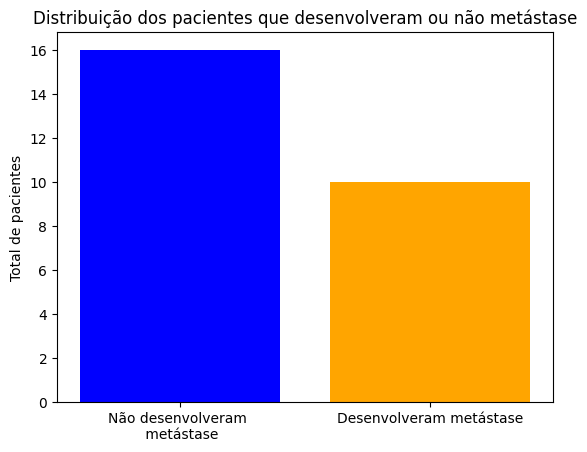

In [54]:
import matplotlib.pyplot as plt

plt.bar([0,1], y.value_counts().values, color=['blue', 'orange'])

# Adding labels and title
# plt.xlabel('Target Value')
plt.ylabel('Total de pacientes')
plt.title('Distribuição dos pacientes que desenvolveram ou não metástase')

# Adding tick labels
plt.xticks(ticks=[0,1], labels=['Não desenvolveram \n metástase', 
                                'Desenvolveram metástase'])
, 
# Display the plot
plt.show()

* Sabemos que as classes estão suficientemente balanceadas (60 - 40)

In [55]:
X_scaled.head()

,T2FS_original_shape_Elongation,T2FS_original_shape_Flatness,T2FS_original_shape_LeastAxisLength,T2FS_original_shape_MajorAxisLength,T2FS_original_shape_Maximum2DDiameterColumn,T2FS_original_shape_Maximum2DDiameterRow,T2FS_original_shape_Maximum2DDiameterSlice,T2FS_original_shape_Maximum3DDiameter,T2FS_original_shape_MeshVolume,T2FS_original_shape_MinorAxisLength,...,T2FS_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_LowGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,T2FS_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,T2FS_wavelet-LLL_ngtdm_Busyness,T2FS_wavelet-LLL_ngtdm_Coarseness,T2FS_wavelet-LLL_ngtdm_Complexity,T2FS_wavelet-LLL_ngtdm_Contrast,T2FS_wavelet-LLL_ngtdm_Strength
0,0.812484,0.959733,0.406441,-0.388768,-0.258283,-0.444984,0.017922,-0.431288,-0.191439,0.072900,...,-0.444750,-0.438704,0.305576,-0.499203,-0.458345,0.802719,-0.461766,-0.640120,-0.261599,-0.804632
1,-0.459492,-0.216749,0.665481,0.440081,0.758238,0.673099,0.157653,0.597676,0.315888,0.372076,...,0.475827,0.025845,-1.861624,-1.022065,-0.188723,1.447035,-0.413347,-0.783584,-0.977474,-0.779173
2,-0.810629,-1.137798,-0.788742,0.047507,0.398019,0.370970,-0.472924,0.212995,-0.421569,-0.347459,...,-0.391562,-0.078104,1.056517,0.818219,0.420273,-0.936013,-0.120654,1.076342,1.031025,1.384371
3,-1.209194,-0.792392,0.493420,0.822229,0.480002,-0.236985,1.206475,1.002488,0.208524,0.174515,...,-0.059000,-0.099370,-1.044822,-0.872201,-0.074992,0.728378,-0.392863,-0.724366,-0.840845,-0.704710
4,-1.494061,-0.765756,3.008981,2.830913,3.011878,3.054054,1.534530,2.868925,4.138171,1.824051,...,-0.418900,-0.543769,-0.027093,0.018645,-0.765533,0.685032,-0.679387,1.026703,-0.846358,-0.419133


In [56]:
y.head()

,T2FS_LungMets
0,0
1,0
2,1
3,0
4,1


## Feature Selection and preparing final data for training and prediction

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

N_FEATURES = 150

X = SelectKBest(f_classif, k=N_FEATURES).fit_transform(X_scaled, y)
X.shape

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(26, 150)

## Searching for best hyperparameters for the Multi-Layer Perceptron (MLP) Neural Network

In [58]:
from matplotlib import rcParams
from sklearn.model_selection import LeaveOneOut, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import (
                            accuracy_score, 
                            precision_score, 
                            recall_score,
                            f1_score, 
                            roc_curve, 
                            auc, 
                            confusion_matrix, 
                            ConfusionMatrixDisplay
                            )


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score

RANDOM_SEED=28

# Define a function to create your Keras model
def create_model(input_dim, hidden_units=128, dropout_rate=0.5, learning_rate=0.001):
    
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                      tf.keras.metrics.Recall(name='recall'),
                      tf.keras.metrics.Precision(name='precision')
                  ]
                 )
    
    return model

# Create a KerasClassifier for scikit-learn compatibility
model = KerasClassifier(build_fn=create_model, input_dim=N_FEATURES, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'hidden_units': [64, 128, 256, 512],
    'dropout_rate': [0.4, 0.5, 0.6],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    'batch_size': [1, 2, 4, 8, 16], # 32
    'epochs': [100] # 50
}

# Define a custom scoring function that combines accuracy, precision, and recall
def custom_scorer(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    # You can assign weights to each metric as needed
    combined_score = 0.6 * accuracy + 0.15 * precision + 0.25 * recall
    
    return combined_score

# Create a scorer based on the custom scoring function
scoring = make_scorer(custom_scorer)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring=scoring,
                                   n_iter=100, cv=3, verbose=2, random_state=RANDOM_SEED, refit=True)

# Fit the RandomizedSearchCV to your data
random_search.fit(X,y) # X_train, y_train

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

## Instantiating the architecture of the Multi-Layer Perceptron (MLP) Neural Network 

In [59]:
def mlp_model():
    
    # Defining the Sequential model
    model = Sequential([
        Dense(1024, activation='relu', input_dim=N_FEATURES),
        Dropout(0.6),
        
        Dense(1024 // 2, activation='relu'),
        Dropout(0.6),
        
        Dense(1024 // 4, activation='relu'),
        Dropout(0.6),
        
        Dense(1, activation='sigmoid')
    ])

    # Compiling the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                      tf.keras.metrics.Recall(name='recall'),
                      tf.keras.metrics.Precision(name='precision')
                  ]
                 )
    
    return model

# Train the model with early stopping to prevent overfitting 
# (does not work to LOOCV, only when we specify validation data)
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=10,  # You can adjust the patience as needed
#     restore_best_weights=True
# )

## Test: LOOCV

In [60]:
# Define the number of epochs
N_EPOCHS=150 #150
THRESHOLD_VAL=0.5
BATCH_SIZE=4 # 4

# Initialize lists to store predicted probabilities and binary predictions
probs_preds_list = []
binary_preds_list = []

# Initialize lists to store training history metrics for plotting
loss_list = []
accuracy_list = []
y_list = []

# Define the feature and label datasets
X = pd.DataFrame(X)
y = y

# 'val_accuracy', 'val_loss'

In [61]:
# Perform LOOCV
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Instantiate the model
    model = mlp_model()
    
    # Fit the model on the training data
    history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, 
                        verbose=1) # callbacks=[early_stopping], use_multiprocessing=True

     # Evaluate the model on the test data and store predictions
    y_probs = model.predict(X_test)
    y_pred_binary = (y_probs >= THRESHOLD_VAL).astype(int)
    
    # Store predicted probabilities and binary predictions for this fold
    # along with it's true label
    probs_preds_list.append(y_probs[0][0])
    binary_preds_list.append(y_pred_binary[0][0])
    y_list.append(y_test.values[0][0])

    # Store the training history metrics for this fold
    loss_list.append(history.history['loss'])
    accuracy_list.append(history.history['accuracy'])



Epoch 1/150


2023-09-19 23:46:52.022539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:46:52.022742: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 23:46:52.022849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

7/7 [==============================] - 3s 4ms/step - loss: 3.0531 - accuracy: 0.3600 - recall: 0.2000 - precision: 0.2000     
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 20.7199 - accuracy: 0.6800 - recall: 0.3000 - precision: 0.7500
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 24.0430 - accuracy: 0.5200 - recall: 0.8000 - precision: 0.4444
Epoch 4/150
7/7 [==============================] - 0s 4ms/step - loss: 29.4997 - accuracy: 0.5600 - recall: 0.4000 - precision: 0.4444
Epoch 5/150
7/7 [==============================] - 0s 4ms/step - loss: 40.8826 - accuracy: 0.5200 - recall: 0.2000 - precision: 0.3333
Epoch 6/150
7/7 [==============================] - 0s 3ms/step - loss: 14.7592 - accuracy: 0.5200 - recall: 0.7000 - precision: 0.4375
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 1.3409 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 8/150
7/7 [==============================] - 0s 4ms/step -

7/7 [==============================] - 0s 3ms/step - loss: 35.9397 - accuracy: 0.6800 - recall: 0.5000 - precision: 0.6250       
Epoch 61/150
7/7 [==============================] - 0s 3ms/step - loss: 21.8933 - accuracy: 0.7600 - recall: 0.9000 - precision: 0.6429
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 9.6087 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 28.0634 - accuracy: 0.7200 - recall: 0.7000 - precision: 0.6364
Epoch 64/150
7/7 [==============================] - 0s 3ms/step - loss: 15.3954 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750    
Epoch 65/150
7/7 [==============================] - 0s 3ms/step - loss: 39.4947 - accuracy: 0.6400 - recall: 0.7000 - precision: 0.5385
Epoch 66/150
7/7 [==============================] - 0s 3ms/step - loss: 42.1926 - accuracy: 0.6400 - recall: 0.4000 - precision: 0.5714
Epoch 67/150
7/7 [==============================] -

7/7 [==============================] - 0s 3ms/step - loss: 89.0710 - accuracy: 0.7200 - recall: 0.7000 - precision: 0.6364
Epoch 120/150
7/7 [==============================] - 0s 3ms/step - loss: 50.7694 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 51.1501 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 122/150
7/7 [==============================] - 0s 3ms/step - loss: 0.9159 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 123/150
7/7 [==============================] - 0s 3ms/step - loss: 65.3627 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182     
Epoch 124/150
7/7 [==============================] - 0s 3ms/step - loss: 48.0230 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778     
Epoch 125/150
7/7 [==============================] - 0s 3ms/step - loss: 80.8920 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 126/150
7/7 [===========================

7/7 [==============================] - 0s 3ms/step - loss: 3.3230 - accuracy: 0.6800 - recall: 0.8000 - precision: 0.5714
Epoch 29/150
7/7 [==============================] - 0s 3ms/step - loss: 3.3879 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 30/150
7/7 [==============================] - 0s 3ms/step - loss: 3.4395 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 31/150
7/7 [==============================] - 0s 3ms/step - loss: 6.5940 - accuracy: 0.6800 - recall: 0.6000 - precision: 0.6000
Epoch 32/150
7/7 [==============================] - 0s 3ms/step - loss: 3.9837 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778     
Epoch 33/150
7/7 [==============================] - 0s 3ms/step - loss: 6.9550 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 34/150
7/7 [==============================] - 0s 3ms/step - loss: 9.7932 - accuracy: 0.7200 - recall: 0.7000 - precision: 0.6364
Epoch 35/150
7/7 [==============================] - 0s 3ms/step

7/7 [==============================] - 0s 3ms/step - loss: 54.5342 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 89/150
7/7 [==============================] - 0s 3ms/step - loss: 74.4077 - accuracy: 0.6800 - recall: 0.5000 - precision: 0.6250
Epoch 90/150
7/7 [==============================] - 0s 3ms/step - loss: 78.1000 - accuracy: 0.7600 - recall: 0.9000 - precision: 0.6429     
Epoch 91/150
7/7 [==============================] - 0s 2ms/step - loss: 132.5536 - accuracy: 0.6400 - recall: 0.4000 - precision: 0.5714   
Epoch 92/150
7/7 [==============================] - 0s 2ms/step - loss: 55.4881 - accuracy: 0.7200 - recall: 0.8000 - precision: 0.6154
Epoch 93/150
7/7 [==============================] - 0s 3ms/step - loss: 59.2428 - accuracy: 0.7200 - recall: 0.8000 - precision: 0.6154
Epoch 94/150
7/7 [==============================] - 0s 3ms/step - loss: 49.6255 - accuracy: 0.6000 - recall: 0.6000 - precision: 0.5000
Epoch 95/150
7/7 [==============================] - 

7/7 [==============================] - 0s 3ms/step - loss: 33.3863 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 148/150
7/7 [==============================] - 0s 3ms/step - loss: 93.2851 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 149/150
7/7 [==============================] - 0s 3ms/step - loss: 34.9055 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 150/150
1/1 [==============================] - 0s 38ms/step
Epoch 1/150
7/7 [==============================] - 1s 3ms/step - loss: 6.0989 - accuracy: 0.3600 - recall: 0.2222 - precision: 0.1818    
Epoch 2/150
7/7 [==============================] - 0s 2ms/step - loss: 34.1255 - accuracy: 0.7200 - recall: 0.2222 - precision: 1.0000    
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 22.1151 - accuracy: 0.4000 - recall: 0.4444 - precision: 0.2857
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 17.1960 - accuracy: 0.6800 - recall: 0.3333 - precisio

7/7 [==============================] - 0s 2ms/step - loss: 78.0973 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 57/150
7/7 [==============================] - 0s 2ms/step - loss: 44.6194 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 58/150
7/7 [==============================] - 0s 3ms/step - loss: 70.5588 - accuracy: 0.7600 - recall: 0.5556 - precision: 0.7143
Epoch 59/150
7/7 [==============================] - 0s 3ms/step - loss: 34.4417 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 15.5560 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 61/150
7/7 [==============================] - 0s 3ms/step - loss: 115.5406 - accuracy: 0.5600 - recall: 0.3333 - precision: 0.3750   
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 48.3871 - accuracy: 0.6400 - recall: 0.5556 - precision: 0.5000    
Epoch 63/150
7/7 [==============================] - 0

7/7 [==============================] - 0s 2ms/step - loss: 61.2201 - accuracy: 0.7600 - recall: 0.5556 - precision: 0.7143
Epoch 116/150
7/7 [==============================] - 0s 3ms/step - loss: 18.4645 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571
Epoch 117/150
7/7 [==============================] - 0s 3ms/step - loss: 15.7328 - accuracy: 0.8400 - recall: 0.5556 - precision: 1.0000
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 12.2206 - accuracy: 0.8000 - recall: 0.5556 - precision: 0.8333
Epoch 119/150
7/7 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 120/150
7/7 [==============================] - 0s 3ms/step - loss: 39.0182 - accuracy: 0.7600 - recall: 0.6667 - precision: 0.6667
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 206.2183 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 122/150
7/7 [==============================] - 0s

7/7 [==============================] - 0s 3ms/step - loss: 15.5271 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000
Epoch 25/150
7/7 [==============================] - 0s 3ms/step - loss: 4.0789 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7692        
Epoch 26/150
7/7 [==============================] - 0s 3ms/step - loss: 10.4075 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 27/150
7/7 [==============================] - 0s 3ms/step - loss: 8.9659 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667    
Epoch 28/150
7/7 [==============================] - 0s 3ms/step - loss: 14.9722 - accuracy: 0.7200 - recall: 0.9000 - precision: 0.6000
Epoch 29/150
7/7 [==============================] - 0s 3ms/step - loss: 2.0500 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 30/150
7/7 [==============================] - 0s 3ms/step - loss: 13.1235 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000
Epoch 31/150
7/7 [==============================] - 

7/7 [==============================] - 0s 3ms/step - loss: 23.3180 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 84/150
7/7 [==============================] - 0s 3ms/step - loss: 11.0571 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 85/150
7/7 [==============================] - 0s 2ms/step - loss: 49.1302 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000
Epoch 86/150
7/7 [==============================] - 0s 3ms/step - loss: 39.0285 - accuracy: 0.8000 - recall: 1.0000 - precision: 0.6667
Epoch 87/150
7/7 [==============================] - 0s 3ms/step - loss: 63.4642 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273     
Epoch 88/150
7/7 [==============================] - 0s 3ms/step - loss: 117.4406 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750    
Epoch 89/150
7/7 [==============================] - 0s 2ms/step - loss: 63.9177 - accuracy: 0.7200 - recall: 0.8000 - precision: 0.6154    
Epoch 90/150
7/7 [=============================

7/7 [==============================] - 0s 3ms/step - loss: 105.5938 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 143/150
7/7 [==============================] - 0s 2ms/step - loss: 69.2594 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 144/150
7/7 [==============================] - 0s 2ms/step - loss: 32.7892 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 145/150
7/7 [==============================] - 0s 3ms/step - loss: 57.5561 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182       
Epoch 146/150
7/7 [==============================] - 0s 3ms/step - loss: 58.3799 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500     
Epoch 147/150
7/7 [==============================] - 0s 2ms/step - loss: 48.9662 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 148/150
7/7 [==============================] - 0s 2ms/step - loss: 121.3602 - accuracy: 0.7600 - recall: 0.6000 - precision: 0.7500
Epoch 149/150
7/7 [======================

7/7 [==============================] - 0s 2ms/step - loss: 24.0701 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750       
Epoch 52/150
7/7 [==============================] - 0s 3ms/step - loss: 24.0487 - accuracy: 0.7200 - recall: 0.5556 - precision: 0.6250
Epoch 53/150
7/7 [==============================] - 0s 3ms/step - loss: 21.5392 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273     
Epoch 54/150
7/7 [==============================] - 0s 3ms/step - loss: 9.1062 - accuracy: 0.8800 - recall: 0.6667 - precision: 1.0000
Epoch 55/150
7/7 [==============================] - 0s 2ms/step - loss: 26.2624 - accuracy: 0.7600 - recall: 0.6667 - precision: 0.6667   
Epoch 56/150
7/7 [==============================] - 0s 2ms/step - loss: 36.6912 - accuracy: 0.7200 - recall: 0.8889 - precision: 0.5714
Epoch 57/150
7/7 [==============================] - 0s 3ms/step - loss: 19.3541 - accuracy: 0.8800 - recall: 0.6667 - precision: 1.0000
Epoch 58/150
7/7 [=============================

7/7 [==============================] - 0s 3ms/step - loss: 52.0135 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 111/150
7/7 [==============================] - 0s 3ms/step - loss: 29.7482 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 112/150
7/7 [==============================] - 0s 3ms/step - loss: 30.2602 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 113/150
7/7 [==============================] - 0s 2ms/step - loss: 30.7908 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 114/150
7/7 [==============================] - 0s 3ms/step - loss: 20.8204 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 115/150
7/7 [==============================] - 0s 3ms/step - loss: 38.5276 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 116/150
7/7 [==============================] - 0s 3ms/step - loss: 215.7132 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 117/150
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 5.7433 - accuracy: 0.6400 - recall: 0.8000 - precision: 0.5333    
Epoch 15/150
7/7 [==============================] - 0s 3ms/step - loss: 4.9735 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667    
Epoch 16/150
7/7 [==============================] - 0s 2ms/step - loss: 3.0604 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000
Epoch 17/150
7/7 [==============================] - 0s 2ms/step - loss: 3.7231 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667
Epoch 18/150
7/7 [==============================] - 0s 2ms/step - loss: 4.3366 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 19/150
7/7 [==============================] - 0s 2ms/step - loss: 12.0544 - accuracy: 0.6000 - recall: 0.5000 - precision: 0.5000
Epoch 20/150
7/7 [==============================] - 0s 3ms/step - loss: 21.8799 - accuracy: 0.5200 - recall: 0.4000 - precision: 0.4000   
Epoch 21/150
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 3ms/step - loss: 68.4066 - accuracy: 0.6800 - recall: 0.7000 - precision: 0.5833
Epoch 74/150
7/7 [==============================] - 0s 2ms/step - loss: 85.7724 - accuracy: 0.7200 - recall: 0.7000 - precision: 0.6364
Epoch 75/150
7/7 [==============================] - 0s 2ms/step - loss: 122.2794 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667
Epoch 76/150
7/7 [==============================] - 0s 3ms/step - loss: 25.7510 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 77/150
7/7 [==============================] - 0s 3ms/step - loss: 28.6992 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000
Epoch 78/150
7/7 [==============================] - 0s 3ms/step - loss: 107.3463 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000    
Epoch 79/150
7/7 [==============================] - 0s 2ms/step - loss: 111.1454 - accuracy: 0.6400 - recall: 0.6000 - precision: 0.5455
Epoch 80/150
7/7 [==============================] - 0s

7/7 [==============================] - 0s 2ms/step - loss: 83.7542 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 133/150
7/7 [==============================] - 0s 2ms/step - loss: 4.1562 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 134/150
7/7 [==============================] - 0s 3ms/step - loss: 0.8778 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 135/150
7/7 [==============================] - 0s 3ms/step - loss: 57.3227 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 136/150
7/7 [==============================] - 0s 3ms/step - loss: 25.4724 - accuracy: 0.8000 - recall: 0.6000 - precision: 0.8571
Epoch 137/150
7/7 [==============================] - 0s 2ms/step - loss: 24.4856 - accuracy: 0.6800 - recall: 0.5000 - precision: 0.6250
Epoch 138/150
7/7 [==============================] - 0s 3ms/step - loss: 20.0752 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 139/150
7/7 [==============================] - 0s 3

7/7 [==============================] - 0s 2ms/step - loss: 6.4574 - accuracy: 0.8000 - recall: 0.6000 - precision: 0.8571
Epoch 37/150
7/7 [==============================] - 0s 2ms/step - loss: 24.8706 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 38/150
7/7 [==============================] - 0s 3ms/step - loss: 13.7006 - accuracy: 0.6000 - recall: 0.6000 - precision: 0.5000
Epoch 39/150
7/7 [==============================] - 0s 3ms/step - loss: 3.4125 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 40/150
7/7 [==============================] - 0s 3ms/step - loss: 5.3573 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 41/150
7/7 [==============================] - 0s 2ms/step - loss: 3.8283 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 42/150
7/7 [==============================] - 0s 3ms/step - loss: 22.6075 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778   
Epoch 43/150
7/7 [==============================] - 0s 3ms/ste

7/7 [==============================] - 0s 3ms/step - loss: 10.0233 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273   
Epoch 96/150
7/7 [==============================] - 0s 2ms/step - loss: 20.3701 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 97/150
7/7 [==============================] - 0s 2ms/step - loss: 6.4966 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 98/150
7/7 [==============================] - 0s 2ms/step - loss: 29.6611 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 99/150
7/7 [==============================] - 0s 2ms/step - loss: 26.1885 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 100/150
7/7 [==============================] - 0s 3ms/step - loss: 22.1420 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 101/150
7/7 [==============================] - 0s 2ms/step - loss: 12.3507 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 102/150
7/7 [==============================] - 0s 3

7/7 [==============================] - 0s 3ms/step - loss: 33.2629 - accuracy: 0.6000 - recall: 0.7778 - precision: 0.4667    
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 13.2411 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 6/150
7/7 [==============================] - 0s 3ms/step - loss: 74.8044 - accuracy: 0.6000 - recall: 0.3333 - precision: 0.4286     
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 10.0521 - accuracy: 0.6800 - recall: 0.5556 - precision: 0.5556
Epoch 8/150
7/7 [==============================] - 0s 2ms/step - loss: 23.7471 - accuracy: 0.7200 - recall: 0.5556 - precision: 0.6250
Epoch 9/150
7/7 [==============================] - 0s 2ms/step - loss: 8.7042 - accuracy: 0.6400 - recall: 0.8889 - precision: 0.5000
Epoch 10/150
7/7 [==============================] - 0s 3ms/step - loss: 13.0512 - accuracy: 0.7200 - recall: 0.5556 - precision: 0.6250    
Epoch 11/150
7/7 [==============================] - 0s

7/7 [==============================] - 0s 3ms/step - loss: 152.8392 - accuracy: 0.8800 - recall: 0.6667 - precision: 1.0000      
Epoch 64/150
7/7 [==============================] - 0s 2ms/step - loss: 39.2394 - accuracy: 0.6800 - recall: 0.7778 - precision: 0.5385
Epoch 65/150
7/7 [==============================] - 0s 2ms/step - loss: 33.6646 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 66/150
7/7 [==============================] - 0s 3ms/step - loss: 58.5804 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 67/150
7/7 [==============================] - 0s 3ms/step - loss: 141.7161 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500    
Epoch 68/150
7/7 [==============================] - 0s 3ms/step - loss: 107.2374 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 69/150
7/7 [==============================] - 0s 3ms/step - loss: 203.5239 - accuracy: 0.6000 - recall: 0.4444 - precision: 0.4444    
Epoch 70/150
7/7 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 6.4394 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 123/150
7/7 [==============================] - 0s 3ms/step - loss: 38.0822 - accuracy: 0.8800 - recall: 0.6667 - precision: 1.0000       
Epoch 124/150
7/7 [==============================] - 0s 2ms/step - loss: 10.9436 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 125/150
7/7 [==============================] - 0s 3ms/step - loss: 22.7503 - accuracy: 0.8400 - recall: 0.5556 - precision: 1.0000   
Epoch 126/150
7/7 [==============================] - 0s 3ms/step - loss: 10.4538 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 127/150
7/7 [==============================] - 0s 2ms/step - loss: 56.1663 - accuracy: 0.7600 - recall: 0.5556 - precision: 0.7143   
Epoch 128/150
7/7 [==============================] - 0s 2ms/step - loss: 9.2013 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750     
Epoch 129/150
7/7 [====================

7/7 [==============================] - 0s 3ms/step - loss: 7.8223 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 32/150
7/7 [==============================] - 0s 3ms/step - loss: 17.9238 - accuracy: 0.6800 - recall: 0.4444 - precision: 0.5714   
Epoch 33/150
7/7 [==============================] - 0s 3ms/step - loss: 15.4266 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273
Epoch 34/150
7/7 [==============================] - 0s 3ms/step - loss: 9.4335 - accuracy: 0.7600 - recall: 1.0000 - precision: 0.6000
Epoch 35/150
7/7 [==============================] - 0s 2ms/step - loss: 1.1773 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 36/150
7/7 [==============================] - 0s 3ms/step - loss: 12.3828 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 37/150
7/7 [==============================] - 0s 3ms/step - loss: 12.5070 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 38/150
7/7 [==============================] - 0s 3ms/st

7/7 [==============================] - 0s 2ms/step - loss: 16.4148 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 92/150
7/7 [==============================] - 0s 2ms/step - loss: 22.7921 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273
Epoch 93/150
7/7 [==============================] - 0s 3ms/step - loss: 43.8618 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 94/150
7/7 [==============================] - 0s 3ms/step - loss: 54.7637 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 95/150
7/7 [==============================] - 0s 3ms/step - loss: 9.3172 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000        
Epoch 96/150
7/7 [==============================] - 0s 3ms/step - loss: 12.5953 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 97/150
7/7 [==============================] - 0s 3ms/step - loss: 48.2150 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778    
Epoch 98/150
7/7 [==============================] 

1/1 [==============================] - 0s 38ms/step
Epoch 1/150
7/7 [==============================] - 1s 3ms/step - loss: 8.0879 - accuracy: 0.6000 - recall: 0.3000 - precision: 0.5000    
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 31.6340 - accuracy: 0.6000 - recall: 0.3000 - precision: 0.5000   
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 41.0872 - accuracy: 0.5200 - recall: 0.9000 - precision: 0.4500
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 51.9158 - accuracy: 0.6400 - recall: 0.4000 - precision: 0.5714    
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 47.7616 - accuracy: 0.4400 - recall: 0.4000 - precision: 0.3333
Epoch 6/150
7/7 [==============================] - 0s 3ms/step - loss: 10.8935 - accuracy: 0.5600 - recall: 0.7000 - precision: 0.4667
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 30.1381 - accuracy: 0.7600 - recall: 0.6000 - precision: 

7/7 [==============================] - 0s 3ms/step - loss: 43.9844 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 26.2078 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 61/150
7/7 [==============================] - 0s 3ms/step - loss: 107.2881 - accuracy: 0.6800 - recall: 0.5000 - precision: 0.6250
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 23.4683 - accuracy: 0.7200 - recall: 0.8000 - precision: 0.6154
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 73.0409 - accuracy: 0.6000 - recall: 0.8000 - precision: 0.5000
Epoch 64/150
7/7 [==============================] - 0s 3ms/step - loss: 16.7770 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 65/150
7/7 [==============================] - 0s 2ms/step - loss: 32.9786 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 66/150
7/7 [==============================] - 0s 3ms/s

7/7 [==============================] - 0s 3ms/step - loss: 15.1820 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 119/150
7/7 [==============================] - 0s 3ms/step - loss: 64.6457 - accuracy: 0.7600 - recall: 0.9000 - precision: 0.6429
Epoch 120/150
7/7 [==============================] - 0s 3ms/step - loss: 33.8655 - accuracy: 0.7600 - recall: 0.9000 - precision: 0.6429
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 3.6406e-21 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 122/150
7/7 [==============================] - 0s 2ms/step - loss: 25.7983 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 123/150
7/7 [==============================] - 0s 3ms/step - loss: 50.2905 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000       
Epoch 124/150
7/7 [==============================] - 0s 3ms/step - loss: 7.2708 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 125/150
7/7 [===========================

7/7 [==============================] - 0s 3ms/step - loss: 2.7885 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833
Epoch 28/150
7/7 [==============================] - 0s 3ms/step - loss: 10.3194 - accuracy: 0.8000 - recall: 0.5556 - precision: 0.8333
Epoch 29/150
7/7 [==============================] - 0s 3ms/step - loss: 17.0312 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273
Epoch 30/150
7/7 [==============================] - 0s 3ms/step - loss: 8.8811 - accuracy: 0.6000 - recall: 0.4444 - precision: 0.4444
Epoch 31/150
7/7 [==============================] - 0s 3ms/step - loss: 4.0496 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 32/150
7/7 [==============================] - 0s 3ms/step - loss: 6.6337 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 33/150
7/7 [==============================] - 0s 3ms/step - loss: 14.2509 - accuracy: 0.7600 - recall: 0.6667 - precision: 0.6667   
Epoch 34/150
7/7 [==============================] - 0s 3ms/ste

7/7 [==============================] - 0s 2ms/step - loss: 47.3151 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 87/150
7/7 [==============================] - 0s 3ms/step - loss: 14.6868 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 88/150
7/7 [==============================] - 0s 3ms/step - loss: 29.5760 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000    
Epoch 89/150
7/7 [==============================] - 0s 3ms/step - loss: 153.1621 - accuracy: 0.7200 - recall: 0.4444 - precision: 0.6667
Epoch 90/150
7/7 [==============================] - 0s 3ms/step - loss: 51.3539 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571     
Epoch 91/150
7/7 [==============================] - 0s 3ms/step - loss: 40.2642 - accuracy: 0.8400 - recall: 1.0000 - precision: 0.6923
Epoch 92/150
7/7 [==============================] - 0s 3ms/step - loss: 43.0712 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 93/150
7/7 [==============================] -

7/7 [==============================] - 0s 2ms/step - loss: 150.1817 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 146/150
7/7 [==============================] - 0s 3ms/step - loss: 87.5618 - accuracy: 0.9200 - recall: 0.8889 - precision: 0.8889
Epoch 147/150
7/7 [==============================] - 0s 3ms/step - loss: 53.2528 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7500
Epoch 148/150
7/7 [==============================] - 0s 3ms/step - loss: 17.4188 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750       
Epoch 149/150
7/7 [==============================] - 0s 2ms/step - loss: 49.4559 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 150/150
1/1 [==============================] - 0s 39ms/step
Epoch 1/150
7/7 [==============================] - 1s 3ms/step - loss: 12.1862 - accuracy: 0.5200 - recall: 0.3000 - precision: 0.3750
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 25.9959 - accuracy: 0.6800 - recall: 0.5000 - pre

7/7 [==============================] - 0s 3ms/step - loss: 44.0831 - accuracy: 0.8000 - recall: 0.5000 - precision: 1.0000       
Epoch 55/150
7/7 [==============================] - 0s 3ms/step - loss: 54.2204 - accuracy: 0.7600 - recall: 0.9000 - precision: 0.6429
Epoch 56/150
7/7 [==============================] - 0s 2ms/step - loss: 5.6147 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 57/150
7/7 [==============================] - 0s 2ms/step - loss: 37.0465 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 58/150
7/7 [==============================] - 0s 3ms/step - loss: 2.7208 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 59/150
7/7 [==============================] - 0s 3ms/step - loss: 6.1907 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 34.9237 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 61/150
7/7 [==============================] - 0s 2m

7/7 [==============================] - 0s 3ms/step - loss: 13.4872 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 114/150
7/7 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 115/150
7/7 [==============================] - 0s 3ms/step - loss: 131.5490 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 116/150
7/7 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 117/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 118/150
7/7 [==============================] - 0s 2ms/step - loss: 20.1066 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000       
Epoch 119/150
7/7 [==============================] - 0s 2ms/step - loss: 13.1480 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091       
Epoch 120/150
7/7 [====================

7/7 [==============================] - 0s 3ms/step - loss: 5.5159 - accuracy: 0.7600 - recall: 0.7778 - precision: 0.6364        
Epoch 23/150
7/7 [==============================] - 0s 3ms/step - loss: 9.2199 - accuracy: 0.7200 - recall: 0.5556 - precision: 0.6250
Epoch 24/150
7/7 [==============================] - 0s 2ms/step - loss: 7.0011 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833    
Epoch 25/150
7/7 [==============================] - 0s 3ms/step - loss: 6.2068 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 26/150
7/7 [==============================] - 0s 3ms/step - loss: 11.7102 - accuracy: 0.6400 - recall: 0.5556 - precision: 0.5000
Epoch 27/150
7/7 [==============================] - 0s 3ms/step - loss: 8.1816 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 28/150
7/7 [==============================] - 0s 2ms/step - loss: 19.1707 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 29/150
7/7 [==============================] - 0s

7/7 [==============================] - 0s 2ms/step - loss: 336.0971 - accuracy: 0.7200 - recall: 0.6667 - precision: 0.6000    
Epoch 82/150
7/7 [==============================] - 0s 2ms/step - loss: 9.4799 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7500
Epoch 83/150
7/7 [==============================] - 0s 3ms/step - loss: 150.9463 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778   
Epoch 84/150
7/7 [==============================] - 0s 3ms/step - loss: 12.7663 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750    
Epoch 85/150
7/7 [==============================] - 0s 3ms/step - loss: 63.1045 - accuracy: 0.8000 - recall: 0.8889 - precision: 0.6667
Epoch 86/150
7/7 [==============================] - 0s 3ms/step - loss: 20.9084 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778       
Epoch 87/150
7/7 [==============================] - 0s 3ms/step - loss: 55.7766 - accuracy: 0.7600 - recall: 0.6667 - precision: 0.6667
Epoch 88/150
7/7 [========================

7/7 [==============================] - 0s 3ms/step - loss: 79.2114 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000       
Epoch 141/150
7/7 [==============================] - 0s 3ms/step - loss: 87.0065 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 142/150
7/7 [==============================] - 0s 3ms/step - loss: 40.8539 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 143/150
7/7 [==============================] - 0s 3ms/step - loss: 95.6089 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273
Epoch 144/150
7/7 [==============================] - 0s 3ms/step - loss: 105.7058 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 145/150
7/7 [==============================] - 0s 3ms/step - loss: 181.7769 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 146/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 147/150
7/7 [========================

7/7 [==============================] - 0s 3ms/step - loss: 16.6522 - accuracy: 0.7600 - recall: 0.5556 - precision: 0.7143
Epoch 50/150
7/7 [==============================] - 0s 3ms/step - loss: 13.7456 - accuracy: 0.6800 - recall: 0.6667 - precision: 0.5455    
Epoch 51/150
7/7 [==============================] - 0s 3ms/step - loss: 9.9193 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 52/150
7/7 [==============================] - 0s 2ms/step - loss: 23.4534 - accuracy: 0.8000 - recall: 0.5556 - precision: 0.8333       
Epoch 53/150
7/7 [==============================] - 0s 3ms/step - loss: 127.1225 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 54/150
7/7 [==============================] - 0s 3ms/step - loss: 26.7268 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833
Epoch 55/150
7/7 [==============================] - 0s 3ms/step - loss: 31.5071 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 56/150
7/7 [==============================] 

7/7 [==============================] - 0s 3ms/step - loss: 224.4060 - accuracy: 0.7200 - recall: 0.5556 - precision: 0.6250
Epoch 109/150
7/7 [==============================] - 0s 3ms/step - loss: 11.0928 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 110/150
7/7 [==============================] - 0s 3ms/step - loss: 311.5455 - accuracy: 0.7200 - recall: 0.6667 - precision: 0.6000
Epoch 111/150
7/7 [==============================] - 0s 3ms/step - loss: 125.7130 - accuracy: 0.7600 - recall: 0.6667 - precision: 0.6667
Epoch 112/150
7/7 [==============================] - 0s 3ms/step - loss: 222.3184 - accuracy: 0.7200 - recall: 0.5556 - precision: 0.6250
Epoch 113/150
7/7 [==============================] - 0s 3ms/step - loss: 119.6539 - accuracy: 0.7600 - recall: 0.5556 - precision: 0.7143
Epoch 114/150
7/7 [==============================] - 0s 3ms/step - loss: 118.9794 - accuracy: 0.8400 - recall: 0.5556 - precision: 1.0000
Epoch 115/150
7/7 [==============================

7/7 [==============================] - 0s 3ms/step - loss: 20.0972 - accuracy: 0.5600 - recall: 0.8889 - precision: 0.4444
Epoch 18/150
7/7 [==============================] - 0s 3ms/step - loss: 14.4260 - accuracy: 0.6000 - recall: 0.4444 - precision: 0.4444        
Epoch 19/150
7/7 [==============================] - 0s 3ms/step - loss: 10.5093 - accuracy: 0.7600 - recall: 0.4444 - precision: 0.8000
Epoch 20/150
7/7 [==============================] - 0s 3ms/step - loss: 12.0516 - accuracy: 0.7600 - recall: 0.6667 - precision: 0.6667
Epoch 21/150
7/7 [==============================] - 0s 3ms/step - loss: 4.1870 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833    
Epoch 22/150
7/7 [==============================] - 0s 3ms/step - loss: 5.9828 - accuracy: 0.7600 - recall: 0.6667 - precision: 0.6667    
Epoch 23/150
7/7 [==============================] - 0s 2ms/step - loss: 2.3268 - accuracy: 0.7200 - recall: 0.6667 - precision: 0.6000    
Epoch 24/150
7/7 [==========================

7/7 [==============================] - 0s 3ms/step - loss: 31.4487 - accuracy: 0.8000 - recall: 0.5556 - precision: 0.8333
Epoch 77/150
7/7 [==============================] - 0s 2ms/step - loss: 60.8639 - accuracy: 0.8000 - recall: 0.8889 - precision: 0.6667    
Epoch 78/150
7/7 [==============================] - 0s 3ms/step - loss: 69.7007 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000       
Epoch 79/150
7/7 [==============================] - 0s 3ms/step - loss: 11.1071 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 80/150
7/7 [==============================] - 0s 2ms/step - loss: 62.9780 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778
Epoch 81/150
7/7 [==============================] - 0s 3ms/step - loss: 47.6762 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000       
Epoch 82/150
7/7 [==============================] - 0s 3ms/step - loss: 7.6770 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 83/150
7/7 [==========================

7/7 [==============================] - 0s 2ms/step - loss: 39.5516 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000    
Epoch 136/150
7/7 [==============================] - 0s 3ms/step - loss: 5.4977 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 137/150
7/7 [==============================] - 0s 3ms/step - loss: 33.3630 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 138/150
7/7 [==============================] - 0s 2ms/step - loss: 63.7228 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 139/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 140/150
7/7 [==============================] - 0s 3ms/step - loss: 103.1953 - accuracy: 0.8400 - recall: 0.8889 - precision: 0.7273
Epoch 141/150
7/7 [==============================] - 0s 3ms/step - loss: 76.3658 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750    
Epoch 142/150
7/7 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 28.5640 - accuracy: 0.6400 - recall: 0.6000 - precision: 0.5455
Epoch 45/150
7/7 [==============================] - 0s 3ms/step - loss: 30.4707 - accuracy: 0.7600 - recall: 0.6000 - precision: 0.7500
Epoch 46/150
7/7 [==============================] - 0s 3ms/step - loss: 19.6884 - accuracy: 0.7200 - recall: 0.7000 - precision: 0.6364
Epoch 47/150
7/7 [==============================] - 0s 3ms/step - loss: 65.9625 - accuracy: 0.6400 - recall: 0.7000 - precision: 0.5385     
Epoch 48/150
7/7 [==============================] - 0s 3ms/step - loss: 44.7841 - accuracy: 0.6800 - recall: 0.6000 - precision: 0.6000
Epoch 49/150
7/7 [==============================] - 0s 3ms/step - loss: 31.3870 - accuracy: 0.7200 - recall: 0.7000 - precision: 0.6364
Epoch 50/150
7/7 [==============================] - 0s 3ms/step - loss: 17.3368 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923
Epoch 51/150
7/7 [==============================] - 0s 3

7/7 [==============================] - 0s 2ms/step - loss: 142.3328 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000
Epoch 104/150
7/7 [==============================] - 0s 3ms/step - loss: 178.8683 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 105/150
7/7 [==============================] - 0s 3ms/step - loss: 40.7224 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 106/150
7/7 [==============================] - 0s 3ms/step - loss: 41.5902 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 107/150
7/7 [==============================] - 0s 2ms/step - loss: 192.1954 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 108/150
7/7 [==============================] - 0s 3ms/step - loss: 174.0862 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 109/150
7/7 [==============================] - 0s 3ms/step - loss: 65.7785 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 110/150
7/7 [==============================] 

7/7 [==============================] - 0s 3ms/step - loss: 16.0612 - accuracy: 0.6400 - recall: 0.7778 - precision: 0.5000    
Epoch 13/150
7/7 [==============================] - 0s 3ms/step - loss: 5.8033 - accuracy: 0.7600 - recall: 0.6667 - precision: 0.6667
Epoch 14/150
7/7 [==============================] - 0s 3ms/step - loss: 1.2275 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 15/150
7/7 [==============================] - 0s 3ms/step - loss: 17.6833 - accuracy: 0.6800 - recall: 0.7778 - precision: 0.5385   
Epoch 16/150
7/7 [==============================] - 0s 3ms/step - loss: 9.8635 - accuracy: 0.7200 - recall: 0.5556 - precision: 0.6250    
Epoch 17/150
7/7 [==============================] - 0s 2ms/step - loss: 3.9291 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778     
Epoch 18/150
7/7 [==============================] - 0s 3ms/step - loss: 6.4491 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500    
Epoch 19/150
7/7 [============================

7/7 [==============================] - 0s 3ms/step - loss: 57.9537 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833
Epoch 72/150
7/7 [==============================] - 0s 3ms/step - loss: 34.7755 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 73/150
7/7 [==============================] - 0s 3ms/step - loss: 2.4191e-16 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 74/150
7/7 [==============================] - 0s 3ms/step - loss: 106.8470 - accuracy: 0.8000 - recall: 0.7778 - precision: 0.7000
Epoch 75/150
7/7 [==============================] - 0s 3ms/step - loss: 98.6491 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 76/150
7/7 [==============================] - 0s 2ms/step - loss: 150.7348 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750      
Epoch 77/150
7/7 [==============================] - 0s 3ms/step - loss: 55.4801 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.7778       
Epoch 78/150
7/7 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 27.6160 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 131/150
7/7 [==============================] - 0s 2ms/step - loss: 12.2982 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8182
Epoch 132/150
7/7 [==============================] - 0s 3ms/step - loss: 1.1645 - accuracy: 0.9600 - recall: 0.8889 - precision: 1.0000
Epoch 133/150
7/7 [==============================] - 0s 3ms/step - loss: 35.7546 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000       
Epoch 134/150
7/7 [==============================] - 0s 3ms/step - loss: 154.7276 - accuracy: 0.9200 - recall: 0.7778 - precision: 1.0000
Epoch 135/150
7/7 [==============================] - 0s 2ms/step - loss: 4.4004 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 136/150
7/7 [==============================] - 0s 2ms/step - loss: 29.4493 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9000
Epoch 137/150
7/7 [==============================

7/7 [==============================] - 0s 4ms/step - loss: 8.3818 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 40/150
7/7 [==============================] - 0s 3ms/step - loss: 11.1221 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667    
Epoch 41/150
7/7 [==============================] - 0s 4ms/step - loss: 7.5927 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 42/150
7/7 [==============================] - 0s 3ms/step - loss: 15.8039 - accuracy: 0.7600 - recall: 0.5000 - precision: 0.8333
Epoch 43/150
7/7 [==============================] - 0s 3ms/step - loss: 11.6404 - accuracy: 0.8000 - recall: 1.0000 - precision: 0.6667
Epoch 44/150
7/7 [==============================] - 0s 4ms/step - loss: 2.9075 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 45/150
7/7 [==============================] - 0s 3ms/step - loss: 16.4825 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 46/150
7/7 [==============================] - 0s 3ms/s

7/7 [==============================] - 0s 3ms/step - loss: 173.7839 - accuracy: 0.6400 - recall: 0.5000 - precision: 0.5556    
Epoch 99/150
7/7 [==============================] - 0s 3ms/step - loss: 91.9896 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000
Epoch 100/150
7/7 [==============================] - 0s 3ms/step - loss: 112.8017 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 101/150
7/7 [==============================] - 0s 3ms/step - loss: 37.8493 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 102/150
7/7 [==============================] - 0s 3ms/step - loss: 115.2865 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 103/150
7/7 [==============================] - 0s 3ms/step - loss: 0.9653 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 104/150
7/7 [==============================] - 0s 3ms/step - loss: 104.7062 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000   
Epoch 105/150
7/7 [===========================

7/7 [==============================] - 0s 3ms/step - loss: 45.5154 - accuracy: 0.5200 - recall: 0.3000 - precision: 0.3750    
Epoch 8/150
7/7 [==============================] - 0s 3ms/step - loss: 42.5839 - accuracy: 0.6400 - recall: 0.8000 - precision: 0.5333
Epoch 9/150
7/7 [==============================] - 0s 3ms/step - loss: 9.8479 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667     
Epoch 10/150
7/7 [==============================] - 0s 3ms/step - loss: 67.6368 - accuracy: 0.5200 - recall: 0.4000 - precision: 0.4000   
Epoch 11/150
7/7 [==============================] - 0s 3ms/step - loss: 10.7955 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667   
Epoch 12/150
7/7 [==============================] - 0s 3ms/step - loss: 13.5024 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667    
Epoch 13/150
7/7 [==============================] - 0s 3ms/step - loss: 10.6316 - accuracy: 0.6800 - recall: 0.5000 - precision: 0.6250
Epoch 14/150
7/7 [===========================

7/7 [==============================] - 0s 3ms/step - loss: 99.1759 - accuracy: 0.7200 - recall: 0.8000 - precision: 0.6154
Epoch 67/150
7/7 [==============================] - 0s 3ms/step - loss: 52.8749 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 68/150
7/7 [==============================] - 0s 3ms/step - loss: 27.2969 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 69/150
7/7 [==============================] - 0s 3ms/step - loss: 91.9227 - accuracy: 0.7200 - recall: 0.7000 - precision: 0.6364
Epoch 70/150
7/7 [==============================] - 0s 3ms/step - loss: 20.2465 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 71/150
7/7 [==============================] - 0s 3ms/step - loss: 54.6559 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 72/150
7/7 [==============================] - 0s 3ms/step - loss: 24.3339 - accuracy: 0.7200 - recall: 0.8000 - precision: 0.6154
Epoch 73/150
7/7 [==============================] - 0s 3ms/st

7/7 [==============================] - 0s 3ms/step - loss: 24.8828 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 126/150
7/7 [==============================] - 0s 3ms/step - loss: 14.0744 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 127/150
7/7 [==============================] - 0s 3ms/step - loss: 0.7801 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 128/150
7/7 [==============================] - 0s 3ms/step - loss: 17.0861 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 129/150
7/7 [==============================] - 0s 3ms/step - loss: 6.3617 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 130/150
7/7 [==============================] - 0s 3ms/step - loss: 51.3407 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 131/150
7/7 [==============================] - 0s 3ms/step - loss: 3.3104e-30 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 132/150
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 6.1258 - accuracy: 0.8000 - recall: 0.9000 - precision: 0.6923
Epoch 35/150
7/7 [==============================] - 0s 3ms/step - loss: 1.1215 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 36/150
7/7 [==============================] - 0s 3ms/step - loss: 18.0242 - accuracy: 0.6000 - recall: 0.7000 - precision: 0.5000
Epoch 37/150
7/7 [==============================] - 0s 3ms/step - loss: 3.3348 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 38/150
7/7 [==============================] - 0s 3ms/step - loss: 15.8150 - accuracy: 0.7600 - recall: 0.5000 - precision: 0.8333    
Epoch 39/150
7/7 [==============================] - 0s 3ms/step - loss: 45.6958 - accuracy: 0.6800 - recall: 0.7000 - precision: 0.5833
Epoch 40/150
7/7 [==============================] - 0s 3ms/step - loss: 8.3077 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 41/150
7/7 [==============================] - 0s 3ms/st

7/7 [==============================] - 0s 3ms/step - loss: 56.5807 - accuracy: 0.8400 - recall: 0.9000 - precision: 0.7500
Epoch 95/150
7/7 [==============================] - 0s 3ms/step - loss: 329.0305 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000
Epoch 96/150
7/7 [==============================] - 0s 3ms/step - loss: 139.0649 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000
Epoch 97/150
7/7 [==============================] - 0s 3ms/step - loss: 46.7669 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 98/150
7/7 [==============================] - 0s 3ms/step - loss: 60.9356 - accuracy: 0.6800 - recall: 0.8000 - precision: 0.5714    
Epoch 99/150
7/7 [==============================] - 0s 3ms/step - loss: 17.8543 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 100/150
7/7 [==============================] - 0s 3ms/step - loss: 14.1567 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 101/150
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 86.4713 - accuracy: 0.5600 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 12.7642 - accuracy: 0.6800 - recall: 0.7000 - precision: 0.5833    
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 18.4203 - accuracy: 0.5600 - recall: 0.7000 - precision: 0.4667
Epoch 6/150
7/7 [==============================] - 0s 3ms/step - loss: 27.8097 - accuracy: 0.6400 - recall: 0.1000 - precision: 1.0000   
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 20.1208 - accuracy: 0.5200 - recall: 0.8000 - precision: 0.4444
Epoch 8/150
7/7 [==============================] - 0s 3ms/step - loss: 13.8257 - accuracy: 0.6800 - recall: 0.6000 - precision: 0.6000    
Epoch 9/150
7/7 [==============================] - 0s 3ms/step - loss: 22.2073 - accuracy: 0.4800 - recall: 0.4000 - precision: 0.3636
Epoch 10/150
7/7 [==============================

7/7 [==============================] - 0s 3ms/step - loss: 26.8394 - accuracy: 0.8000 - recall: 1.0000 - precision: 0.6667
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 16.0905 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 64/150
7/7 [==============================] - 0s 3ms/step - loss: 26.5485 - accuracy: 0.7200 - recall: 0.5000 - precision: 0.7143    
Epoch 65/150
7/7 [==============================] - 0s 3ms/step - loss: 46.7062 - accuracy: 0.6800 - recall: 0.7000 - precision: 0.5833
Epoch 66/150
7/7 [==============================] - 0s 3ms/step - loss: 25.9787 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273     
Epoch 67/150
7/7 [==============================] - 0s 3ms/step - loss: 38.0392 - accuracy: 0.6800 - recall: 0.7000 - precision: 0.5833
Epoch 68/150
7/7 [==============================] - 0s 3ms/step - loss: 6.0615 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.9000
Epoch 69/150
7/7 [==============================] - 0

7/7 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000
Epoch 122/150
7/7 [==============================] - 0s 3ms/step - loss: 39.3512 - accuracy: 0.6400 - recall: 0.6000 - precision: 0.5455
Epoch 123/150
7/7 [==============================] - 0s 3ms/step - loss: 24.0405 - accuracy: 0.6400 - recall: 0.5000 - precision: 0.5556
Epoch 124/150
7/7 [==============================] - 0s 3ms/step - loss: 13.4386 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000   
Epoch 125/150
7/7 [==============================] - 0s 3ms/step - loss: 15.4503 - accuracy: 0.7600 - recall: 0.5000 - precision: 0.8333   
Epoch 126/150
7/7 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000    
Epoch 127/150
7/7 [==============================] - 0s 3ms/step - loss: 93.2910 - accuracy: 0.7200 - recall: 0.5000 - precision: 0.7143
Epoch 128/150
7/7 [============================

7/7 [==============================] - 0s 4ms/step - loss: 6.1827 - accuracy: 0.7200 - recall: 0.6667 - precision: 0.6000
Epoch 31/150
7/7 [==============================] - 0s 3ms/step - loss: 10.5475 - accuracy: 0.8000 - recall: 0.5556 - precision: 0.8333
Epoch 32/150
7/7 [==============================] - 0s 3ms/step - loss: 10.4221 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833
Epoch 33/150
7/7 [==============================] - 0s 3ms/step - loss: 25.4045 - accuracy: 0.8000 - recall: 0.5556 - precision: 0.8333
Epoch 34/150
7/7 [==============================] - 0s 3ms/step - loss: 5.6839 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500    
Epoch 35/150
7/7 [==============================] - 0s 3ms/step - loss: 45.0519 - accuracy: 0.6800 - recall: 0.7778 - precision: 0.5385
Epoch 36/150
7/7 [==============================] - 0s 3ms/step - loss: 14.0900 - accuracy: 0.8000 - recall: 0.6667 - precision: 0.7500
Epoch 37/150
7/7 [==============================] - 0s 3ms/

7/7 [==============================] - 0s 3ms/step - loss: 144.5527 - accuracy: 0.7200 - recall: 0.5556 - precision: 0.6250
Epoch 90/150
7/7 [==============================] - 0s 3ms/step - loss: 148.5302 - accuracy: 0.7200 - recall: 0.7778 - precision: 0.5833    
Epoch 91/150
7/7 [==============================] - 0s 3ms/step - loss: 104.5493 - accuracy: 0.7600 - recall: 0.5556 - precision: 0.7143
Epoch 92/150
7/7 [==============================] - 0s 3ms/step - loss: 17.6053 - accuracy: 0.8400 - recall: 0.5556 - precision: 1.0000       
Epoch 93/150
7/7 [==============================] - 0s 3ms/step - loss: 44.5529 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.8000
Epoch 94/150
7/7 [==============================] - 0s 3ms/step - loss: 29.8872 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7500    
Epoch 95/150
7/7 [==============================] - 0s 3ms/step - loss: 18.8493 - accuracy: 0.8800 - recall: 0.7778 - precision: 0.8750
Epoch 96/150
7/7 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 4.1319 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571
Epoch 149/150
7/7 [==============================] - 0s 3ms/step - loss: 0.1718 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.8571        
Epoch 150/150
1/1 [==============================] - 0s 37ms/step
Epoch 1/150
7/7 [==============================] - 1s 3ms/step - loss: 6.2875 - accuracy: 0.5200 - recall: 0.5000 - precision: 0.4167
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 36.1000 - accuracy: 0.6000 - recall: 0.5000 - precision: 0.5000
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 29.6943 - accuracy: 0.6000 - recall: 0.6000 - precision: 0.5000
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 25.0598 - accuracy: 0.5200 - recall: 0.5000 - precision: 0.4167   
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 25.9646 - accuracy: 0.6000 - recall: 0.6000 - precision

7/7 [==============================] - 0s 3ms/step - loss: 27.1159 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778    
Epoch 58/150
7/7 [==============================] - 0s 3ms/step - loss: 62.6441 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 59/150
7/7 [==============================] - 0s 3ms/step - loss: 26.0595 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 20.1240 - accuracy: 0.7600 - recall: 0.7000 - precision: 0.7000
Epoch 61/150
7/7 [==============================] - 0s 3ms/step - loss: 14.2512 - accuracy: 0.8400 - recall: 1.0000 - precision: 0.7143
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 8.7748 - accuracy: 0.8400 - recall: 1.0000 - precision: 0.7143
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 77.4900 - accuracy: 0.5600 - recall: 0.6000 - precision: 0.4615
Epoch 64/150
7/7 [==============================] - 0s 3ms

7/7 [==============================] - 0s 4ms/step - loss: 45.1945 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.8333
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 4.3839 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000        
Epoch 119/150
7/7 [==============================] - 0s 4ms/step - loss: 2.5241 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091
Epoch 120/150
7/7 [==============================] - 0s 4ms/step - loss: 25.6016 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 121/150
7/7 [==============================] - 0s 4ms/step - loss: 4.6547 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000     
Epoch 122/150
7/7 [==============================] - 0s 4ms/step - loss: 42.0552 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 123/150
7/7 [==============================] - 0s 3ms/step - loss: 79.3027 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 124/150
7/7 [==========================

7/7 [==============================] - 0s 2ms/step - loss: 10.3241 - accuracy: 0.7200 - recall: 0.8000 - precision: 0.6154    
Epoch 27/150
7/7 [==============================] - 0s 3ms/step - loss: 35.6739 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 28/150
7/7 [==============================] - 0s 3ms/step - loss: 8.2165 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 29/150
7/7 [==============================] - 0s 2ms/step - loss: 14.9967 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 30/150
7/7 [==============================] - 0s 2ms/step - loss: 27.8456 - accuracy: 0.5600 - recall: 0.6000 - precision: 0.4615    
Epoch 31/150
7/7 [==============================] - 0s 3ms/step - loss: 3.1885 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 32/150
7/7 [==============================] - 0s 3ms/step - loss: 9.5366 - accuracy: 0.8000 - recall: 0.6000 - precision: 0.8571
Epoch 33/150
7/7 [==============================] - 0s 3

7/7 [==============================] - 0s 3ms/step - loss: 23.8986 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 87/150
7/7 [==============================] - 0s 3ms/step - loss: 56.1518 - accuracy: 0.7200 - recall: 0.9000 - precision: 0.6000
Epoch 88/150
7/7 [==============================] - 0s 3ms/step - loss: 31.5023 - accuracy: 0.7600 - recall: 0.6000 - precision: 0.7500
Epoch 89/150
7/7 [==============================] - 0s 3ms/step - loss: 49.1023 - accuracy: 0.7200 - recall: 0.6000 - precision: 0.6667
Epoch 90/150
7/7 [==============================] - 0s 3ms/step - loss: 149.1065 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000      
Epoch 91/150
7/7 [==============================] - 0s 2ms/step - loss: 11.7926 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 92/150
7/7 [==============================] - 0s 3ms/step - loss: 77.5302 - accuracy: 0.8800 - recall: 1.0000 - precision: 0.7692
Epoch 93/150
7/7 [==============================] - 0s

7/7 [==============================] - 0s 3ms/step - loss: 6.7831 - accuracy: 0.9600 - recall: 0.9000 - precision: 1.0000
Epoch 146/150
7/7 [==============================] - 0s 2ms/step - loss: 2.4769 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091     
Epoch 147/150
7/7 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9600 - recall: 1.0000 - precision: 0.9091        
Epoch 148/150
7/7 [==============================] - 0s 3ms/step - loss: 88.7721 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 149/150
7/7 [==============================] - 0s 3ms/step - loss: 41.0532 - accuracy: 0.9200 - recall: 0.8000 - precision: 1.0000    
Epoch 150/150
1/1 [==============================] - 0s 39ms/step
Epoch 1/150
7/7 [==============================] - 1s 3ms/step - loss: 11.8621 - accuracy: 0.4800 - recall: 0.1000 - precision: 0.2000       
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 18.9323 - accuracy: 0.6400 - recall:

7/7 [==============================] - 0s 3ms/step - loss: 23.9493 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.7273
Epoch 55/150
7/7 [==============================] - 0s 4ms/step - loss: 77.7768 - accuracy: 0.5200 - recall: 0.6000 - precision: 0.4286
Epoch 56/150
7/7 [==============================] - 0s 3ms/step - loss: 55.0245 - accuracy: 0.7200 - recall: 0.5000 - precision: 0.7143    
Epoch 57/150
7/7 [==============================] - 0s 3ms/step - loss: 67.9312 - accuracy: 0.6800 - recall: 0.5000 - precision: 0.6250
Epoch 58/150
7/7 [==============================] - 0s 3ms/step - loss: 57.5458 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000   
Epoch 59/150
7/7 [==============================] - 0s 3ms/step - loss: 60.3768 - accuracy: 0.6000 - recall: 0.8000 - precision: 0.5000
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 74.6897 - accuracy: 0.6400 - recall: 0.6000 - precision: 0.5455    
Epoch 61/150
7/7 [==============================] 

7/7 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000
Epoch 115/150
7/7 [==============================] - 0s 3ms/step - loss: 7.2275 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778    
Epoch 116/150
7/7 [==============================] - 0s 3ms/step - loss: 1.3976 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 117/150
7/7 [==============================] - 0s 3ms/step - loss: 17.8193 - accuracy: 0.7600 - recall: 0.5000 - precision: 0.8333
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 1.3068 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 119/150
7/7 [==============================] - 0s 3ms/step - loss: 1.4300 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 120/150
7/7 [==============================] - 0s 3ms/step - loss: 4.1890 - accuracy: 0.8400 - recall: 0.6000 - precision: 1.0000    
Epoch 121/150
7/7 [==============================] - 

7/7 [==============================] - 0s 3ms/step - loss: 11.5667 - accuracy: 0.6000 - recall: 0.5000 - precision: 0.5000    
Epoch 24/150
7/7 [==============================] - 0s 4ms/step - loss: 22.3707 - accuracy: 0.6400 - recall: 0.4000 - precision: 0.5714    
Epoch 25/150
7/7 [==============================] - 0s 3ms/step - loss: 13.1321 - accuracy: 0.6800 - recall: 0.7000 - precision: 0.5833
Epoch 26/150
7/7 [==============================] - 0s 3ms/step - loss: 5.9983 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 27/150
7/7 [==============================] - 0s 3ms/step - loss: 9.9340 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 28/150
7/7 [==============================] - 0s 3ms/step - loss: 24.1522 - accuracy: 0.6800 - recall: 0.6000 - precision: 0.6000
Epoch 29/150
7/7 [==============================] - 0s 3ms/step - loss: 12.7774 - accuracy: 0.6400 - recall: 0.7000 - precision: 0.5385
Epoch 30/150
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 3ms/step - loss: 33.2225 - accuracy: 0.7600 - recall: 0.9000 - precision: 0.6429
Epoch 83/150
7/7 [==============================] - 0s 3ms/step - loss: 26.4677 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.8000
Epoch 84/150
7/7 [==============================] - 0s 3ms/step - loss: 28.3284 - accuracy: 0.6800 - recall: 0.6000 - precision: 0.6000    
Epoch 85/150
7/7 [==============================] - 0s 3ms/step - loss: 38.8490 - accuracy: 0.7600 - recall: 0.6000 - precision: 0.7500       
Epoch 86/150
7/7 [==============================] - 0s 3ms/step - loss: 248.3418 - accuracy: 0.6800 - recall: 0.6000 - precision: 0.6000  
Epoch 87/150
7/7 [==============================] - 0s 3ms/step - loss: 35.8304 - accuracy: 0.7600 - recall: 0.8000 - precision: 0.6667
Epoch 88/150
7/7 [==============================] - 0s 3ms/step - loss: 62.5388 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.8182
Epoch 89/150
7/7 [=============================

7/7 [==============================] - 0s 3ms/step - loss: 3.6687 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.7778
Epoch 142/150
7/7 [==============================] - 0s 3ms/step - loss: 25.6197 - accuracy: 0.7200 - recall: 0.7000 - precision: 0.6364
Epoch 143/150
7/7 [==============================] - 0s 3ms/step - loss: 2.6980 - accuracy: 0.8800 - recall: 0.7000 - precision: 1.0000
Epoch 144/150
7/7 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 145/150
7/7 [==============================] - 0s 3ms/step - loss: 5.0386 - accuracy: 0.8400 - recall: 0.7000 - precision: 0.8750
Epoch 146/150
7/7 [==============================] - 0s 3ms/step - loss: 514.6113 - accuracy: 0.6800 - recall: 0.4000 - precision: 0.6667
Epoch 147/150
7/7 [==============================] - 0s 3ms/step - loss: 5.2529 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8889
Epoch 148/150
7/7 [==============================] - 0s 3ms

In [62]:
binary_list = binary_preds_list
probs_list = probs_preds_list
y_list = y_list

# Calculate and print the overall metrics after LOOCV
overall_accuracy = accuracy_score(y_list, binary_list)
overall_precision = precision_score(y_list, binary_list)
overall_recall = recall_score(y_list, binary_list)
overall_f1 = f1_score(y_list, binary_list)

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F1 Score: {overall_f1:.2f}')

Overall Accuracy: 0.65
Overall Precision: 0.56
Overall Recall: 0.50
Overall F1 Score: 0.53


Text(0.5, 1.0, 'Matriz de Confusão para extração T1')

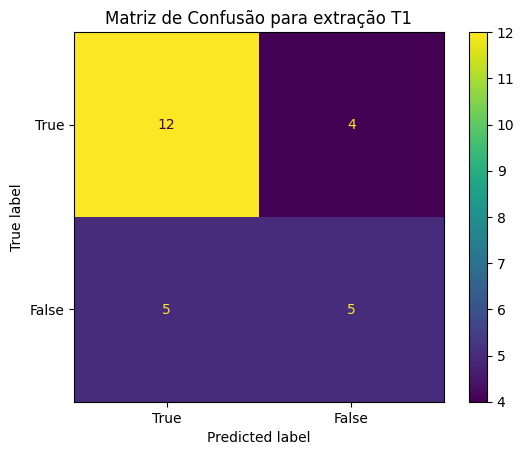

In [63]:
# Calculate and plot the overall confusion matrix
overall_cm = confusion_matrix(y_list, binary_list)
ConfusionMatrixDisplay(overall_cm, display_labels=['True', "False"]).plot()
plt.title('Matriz de Confusão para extração T1')

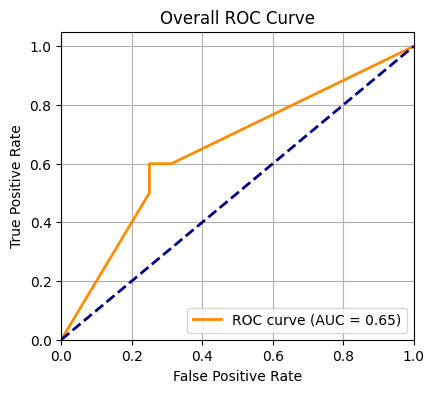

In [64]:
# Calculate and plot the overall ROC curve and AUC
fpr, tpr, _ = roc_curve(y_list, probs_list)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)


# -------------------------------------------- Draft ------------------------------------------------------ #

## Test: CV-KFold (futuro)

In [ ]:
# Define the number of epochs
N_EPOCHS=100
RANDOM_SEED=759
N_SAMPLES=10 # number of rowKFolds in each validation fold

# Initialize lists to store predicted probabilities and binary predictions
probs_preds_list = []
binary_preds_list = []

# Initialize lists to store training history metrics for plotting
loss_list = []
accuracy_list = []
precision_list = []
recall_list = []
y_list = []

# Define the feature and label datasets
X = X_scaled
y = y

# Perform LOOCV
# loo = LeaveOneOut()

# Calculate the number of splits based on the number of rows
N_SPLITS = len(X) // N_SAMPLES

# Create the KFold cross-validator
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)


In [ ]:
for train_index, test_index in kf.split(X): # loo.split(X)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Instantiate the model
    model = mlp_model()
    
    # Fit the model on the training data
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, callbacks=[early_stopping], verbose=1)
    # usar validation_data aqui no fit msm ????
    
    # Evaluate the model on the test data and store predictions
    y_probs = model.predict(X_test)
    y_pred_binary = (y_probs > 0.5).astype(int)
    
    y_list.append(y_test.values[0][0])

    # Store predicted probabilities and binary predictions for this fold
    probs_preds_list.append(y_probs)
    binary_preds_list.append(y_pred_binary)

    # Store the training history metrics for this fold
    loss_list.append(history.history['loss'])
    accuracy_list.append(history.history['accuracy'])
    recall_list.append(history.history['recall'])
    precision_list.append(history.history['precision'])
    
   # 'val_accuracy', 'val_loss' 


In [ ]:
# ta errado, só faz sentido calcular a média da amostra de validação

# Convert the lists to NumPy arrays
probs_array = np.concatenate(probs_list)
binary_preds_array = np.concatenate(binary_preds_list)
loss_array = np.concatenate(loss_list)
accuracy_array = np.concatenate(accuracy_list)
precision_array = np.concatenate(precision_list)
recall_array = np.concatenate(recall_list)
f1_array = np.concatenate(f1_list)

# Calculate and print the overall metrics after LOOCV
overall_accuracy = accuracy_score(y, binary_preds_array)
overall_precision = precision_score(y, binary_preds_array)
overall_recall = recall_score(y, binary_preds_array)
overall_f1 = f1_score(y, binary_preds_array)

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F1 Score: {overall_f1:.2f}')



In [ ]:
# Calculate and plot the overall confusion matrix
overall_cm = confusion_matrix(y, binary_preds_array)
ConfusionMatrixDisplay(overall_cm, display_labels=['Class 0', 'Class 1']).plot()
plt.title('Overall Confusion Matrix')

In [ ]:
# Calculate and plot the overall ROC curve and AUC
fpr, tpr, _ = roc_curve(y, probs_array)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)


In [ ]:
# Plot the training history for all folds in the same plot
# plt.subplot(1, 2, 2)

rcParams['figure.figsize'] = (15, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

for i, loss in enumerate(loss_list):
    plt.plot(loss, label=f'Fold {i + 1} Loss', linestyle='--')
    plt.plot(accuracy_list[i], label=f'Fold {i + 1} Accuracy', linestyle='-')
    plt.plot(precision_list[i], label=f'Fold {i + 1} Precision', linestyle='-.')
    plt.plot(recall_list[i], label=f'Fold {i + 1} Recall', linestyle=':')


plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
# plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------------------------- Draft ------------------------------------------------- #